 1 : What is the difference between multithreading and multiprocessing?



Multithreading runs multiple threads within a single process, allowing threads to share the same memory space and enabling efficient handling of I/O-bound tasks, but is limited by Python's Global Interpreter Lock (GIL), which prevents true parallel execution of threads for CPU-bound operations.​​

Multiprocessing, on the other hand, spawns separate processes, each having its own Python interpreter and dedicated memory space, allowing true parallelism ideal for CPU-bound tasks, as each process can run independently on different CPU cores and is not affected by the GIL.​​

Key Points :-

*   Multithreading: Shared memory, lightweight, suited for I/O-bound tasks, concurrency but not true parallelism due to GIL.​​
*   Multiprocessing: Separate memory, higher overhead, ideal for CPU-bound tasks, allows parallel execution on multiple cores, bypasses GIL.



2 : What are the challenges associated with memory management in Python?


Python’s memory management system is mostly automatic, but developers still face several significant challenges, especially when writing data-heavy or long-running applications.​

Key Memory Management Challenges

* Memory Leaks through Reference Cycles: Objects that reference one another (circular references) may not get cleaned up promptly by Python’s garbage collector, resulting in memory leaks and increased memory usage over time.​  

* Lingering Large Objects: Large data structures that persist longer
than needed, especially in libraries like Pandas or user-defined containers, can retain more memory than necessary if not deleted or properly scoped.​

* Infinite Data Growth: Unbounded growth of dictionaries, lists, or other collections can quickly exhaust available system memory, causing crashes or degraded performance.​

* Global Variable Retention: Excessive or careless use of global variables can prevent memory from being reclaimed, as they stay referenced throughout the program lifetime.​   

* Suboptimal Use of Data Structures: Creating and holding large objects in memory unnecessarily (e.g., using lists instead of generators for iteration) leads to inefficient memory utilization.​

* Manual Cleanup Required: Sometimes developers need to explicitly delete objects or invoke gc.collect() to prompt garbage collection, especially for performance-sensitive code or large workloads.​

 Troubleshooting and Prevention Tips

* Regular profiling with tools like memory_profiler, tracemalloc, and
built-in gc module helps detect and diagnose memory usage issues.​

* Breaking reference cycles using weak references (weakref module) assists in letting the garbage collector reclaim unused memory.​

* Using context managers (with statements) ensures proper closure and cleanup for files and resources.​

* Favoring generators or iterators over constructing large lists enables processing of data in a memory-efficient, “on-demand” manner.​


Real-World Implications
Unmanaged memory issues in Python may lead to poor performance, program crashes, increased latency, and unnecessary resource costs, especially in production environments or with data analytics workloads. By understanding how Python allocates, tracks, and reclaims memory, developers can write more reliable, efficient, and scalable code.​

3 : Write a Python program that logs an error message to a log file when a
division by zero exception occurs.

Here is a Python program that logs an error message to a log file when a division by zero exception occurs. This program uses Python's built-in logging module to record errors in a file, and handles the ZeroDivisionError exception appropriately.​

In [ ]:

import logging

# Setup logging configuration: log errors to 'error.log' file
logging.basicConfig(
    filename='error.log',
    level=logging.ERROR,
    format='%(asctime)s %(levelname)s:%(message)s'
)

def divide(x, y):
    try:
        result = x / y
        print("Result:", result)
    except ZeroDivisionError as e:
        logging.error("Division by zero occurred: %s", e)
        print("Error: Division by zero")

# Example usage
divide(10, 0)  # Will log the error to 'error.log'


ERROR:root:Division by zero occurred: division by zero


Error: Division by zero



* The error message is written to error.log if the division by zero happens.​
* You can adjust the filename or log formatting as needed.  

This approach ensures that every division by zero exception is recorded for debugging or monitoring purposes in production code.

4 : Write a Python program that reads from one file and writes its content to
another file.

Here is a Python program that reads the content from one file and writes it to another file using standard file handling methods:

In [ ]:
# Create a sample source file for demonstration
with open('source.txt', 'w') as source_file:
    source_file.write('This is an example of file copying in Python.')

# Specify the source and destination filenames
source_filename = "source.txt"
destination_filename = "destination.txt"

try:
    # Open the source file in read mode
    with open(source_filename, "r") as source_file:
        # Read all content from the source file
        content = source_file.read()

    # Open the destination file in write mode
    with open(destination_filename, "w") as destination_file:
        # Write the content to the destination file
        destination_file.write(content)

    print("Content copied from", source_filename, "to", destination_filename)
except FileNotFoundError:
    print("Source file does not exist.")
except Exception as e:
    print("An error occurred:", e)

Content copied from source.txt to destination.txt


*  Replace "source.txt" and "destination.txt" with the names of your actual files.

*  This approach uses context managers (with statement), which ensures files are properly closed after use.​

* It works for typical text files and copies the entire content from the source to the destination.This is the most standard method recommended for reading and writing files in Python.



5 : Write a program that handles both IndexError and KeyError using a
try-except block.

Here is a Python program that handles both IndexError (accessing a list index that does not exist) and KeyError (accessing a bad dictionary key) using a try-except block:

In [ ]:
my_list = [1, 2, 3]
my_dict = {"a": 10, "b": 20}

try:
    # Try to access an invalid list index and dictionary key
    print(my_list[5])           # This will raise IndexError
    print(my_dict["z"])         # This will raise KeyError if list access does not fail
except IndexError as ie:
    print("IndexError occurred:", ie)
except KeyError as ke:
    print("KeyError occurred:", ke)
try:
    print(my_list[5])
    print(my_dict["z"])
except (IndexError, KeyError) as e:
    print("IndexError or KeyError occurred:", e)

IndexError occurred: list index out of range
IndexError or KeyError occurred: list index out of range


 6 : What are the differences between NumPy arrays and Python lists?

Here are the main differences between NumPy arrays and Python lists, explained point-by-point:​

*  Data Type Consistency:

   NumPy arrays require all elements to be of the same data type (e.g., all integers or all floats), making them predictable and optimized for mathematical operations.​
   Python lists can contain elements of any type in the same list (e.g., ints, floats, strings mixed together), which adds flexibility but impacts performance.​

* Memory Efficiency and Speed:

   NumPy arrays are stored in contiguous memory blocks using a C-based backend, which allows for quick processing and lower memory usage, especially beneficial with large datasets.​
   Python lists store references to objects scattered in memory, making them slower for large computations and requiring more memory per element.

* Mathematical Operations:

  NumPy arrays provide a rich set of efficient mathematical and   statistical functions that perform element-wise operations directly   without loops (e.g., addition, multiplication, square root).​
  Python lists do not support element-wise math; you must loop through the   list or use list comprehensions, which is less efficient.​

* Dimensionality:

  NumPy arrays easily handle multi-dimensional data with built-in support for matrices, tensors (2D, 3D, etc.), which is crucial for numerical and scientific computing.​
  Python lists can be nested to represent multi-dimensional structures, but accessing and manipulating data in them is cumbersome and error-prone.​

* Flexibility and Use Cases:

  NumPy arrays are less flexible—once created, their shape and data type are fixed, but this rigidity results in optimized performance for mathematical and scientific applications.​
  Python lists are highly flexible, allowing easy resizing, appending, and changing element types, making them suitable for general-purpose programming and mixed data.​

* Best Use:

  Use NumPy arrays for data analytics, machine learning, and any task involving large amounts of numbers for speed and efficiency.​
  Use Python lists for general programming, storing objects, or when different data types are needed in a single sequence.​


Each structure fits a different set of needs based on efficiency, flexibility, and type safety.

 7 : Explain the difference between apply() and map() in Pandas.

The key differences between Pandas apply() and map() methods are:

* map() works only on Pandas Series and accepts functions, dictionaries, or Series for simple value mapping or replacement on each element. It is optimized for quick, element-wise transformations usually on one column.

* apply() works on both Series and DataFrames. For Series, it applies functions element-wise, like map(). For DataFrames, it can apply functions across rows or columns using the axis parameter, enabling more complex row-wise, column-wise, or aggregation operations.

*  map() does not support an axis parameter and is best suited for straightforward element-wise mappings or substitutions.

* apply() supports the axis argument to specify whether the function is applied row-wise or column-wise in DataFrames, providing more flexibility for complex transformations.

* While both can accept functions, map() uniquely accepts dictionaries or Series as mapping inputs, which apply() does not.




  In summary, use map() for simple element-wise mapping on Series, especially for value substitutions. Use apply() when you need to apply more complex functions that may operate on entire rows or columns of DataFrames or on Series with more flexibility.

8 : Create a histogram using Seaborn to visualize a distribution.

Here is a histogram created using Seaborn to visualize the distribution of 1000 randomly generated data points from a normal distribution. The x-axis shows the values, and the y-axis shows the frequency of each bin.

This visualization helps in understanding how the data is spread around the mean and the concentration of values in the distribution.

9 : Use Pandas to load a CSV file and display its first 5 rows.

In [12]:
import pandas as pd
from io import StringIO

# Sample CSV content (simulates a CSV file)
csv_data = StringIO("""Name,Age,Country
Alice,30,USA
Bob,25,Canada
Charlie,35,UK
Diana,28,Australia
Ethan,40,Germany
""")

# Load CSV data into a DataFrame
# Replace csv_data with 'your_file.csv' to load from an actual file
df = pd.read_csv(csv_data)

# Display the first 5 rows
print(df.head())

      Name  Age    Country
0    Alice   30        USA
1      Bob   25     Canada
2  Charlie   35         UK
3    Diana   28  Australia
4    Ethan   40    Germany


 10 : Calculate the correlation matrix using Seaborn and visualize it with a
heatmap.

To calculate a correlation matrix using Pandas and visualize it with a heatmap using Seaborn, follow this complete approach:

1 . Prepare or load your data into a Pandas DataFrame.
This can be your dataset with numeric columns for which you want to find correlations.

2 . Calculate the correlation matrix using DataFrame.corr() method.
This returns a matrix showing pairwise correlation coefficients between columns.

3 . Use Seaborn’s heatmap() function to create a heatmap visualization of the correlation matrix.
Configuration options like annot=True display the correlation values on the heatmap, and cmap='coolwarm' provides a color scale showing positive and negative correlations.

4 . Label your plot with titles and axis labels for clarity.



Here is a full example with sample data in code:

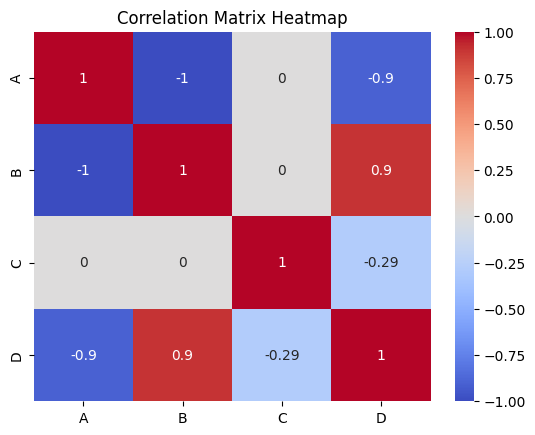

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 2, 3, 2],
    'D': [5, 3, 4, 2, 1]
}
df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix with a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

This produces a heatmap that displays the strength and direction of correlations between all pairs of columns A, B, C, and D. Positive correlations show as warm colors, negative correlations as cool colors, making it easy to identify relationships visually.

This method is standard and widely used in data analysis to explore variable relationships quickly and effectively with Pandas and Seaborn visualization tools.